Evaluation Project - 9
Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 


Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('CAR_INSURANCE_FRAUD.csv')


In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

In [6]:
#checking duplicates
df.duplicated('policy_number').sum()

0

In [7]:
df.isin([' ','NA','-']).sum().any()

False

In [8]:
df.isin(['?']).sum().any()

True

In [9]:
df=df.replace('?',np.NaN)

In [10]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
bodily_injuries                           0             0.0
incident_state                            0             0.0
incident_city                             0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
fraud_reported                            0             0.0
auto_year                                 0             0.0
auto_model                                0             0.0
authorities_contacted                     0             0.0
total_claim_amount                        0             0.0
injury_claim                            

In [11]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [12]:
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

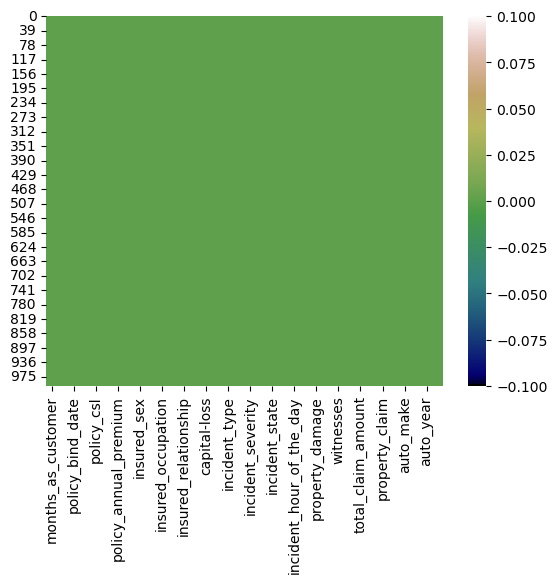

In [13]:
sns.heatmap(df.isnull(),cmap="gist_earth")
plt.show()

In [14]:
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [15]:
df.drop("policy_csl",axis=1,inplace=True)

In [16]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [17]:
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

In [18]:
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [19]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [20]:
df.drop(['incident_year'],axis=1,inplace=True)

In [21]:
df['Automobile_Age']=2015 - df['auto_year']

In [22]:
df.drop("auto_year",axis=1,inplace=True)

In [23]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']

In [24]:
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [25]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

In [26]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,...,52761.94000,7433.420000,7399.570000,37928.950000,15.448000,6.559000,2001.604000,13.08400,3.407000,9.897000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,...,26401.53319,4880.951853,4824.726179,18886.252893,8.850176,3.391758,7.360391,10.44318,3.276291,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,...,100.00000,0.000000,0.000000,70.000000,1.000000,1.000000,1990.000000,1.00000,1.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,...,41812.50000,4295.000000,4445.000000,30292.500000,8.000000,4.000000,1995.000000,2.00000,1.000000,5.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,...,58055.00000,6775.000000,6750.000000,42100.000000,16.000000,7.000000,2002.000000,15.00000,2.000000,10.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,...,70592.50000,11305.000000,10885.000000,50822.500000,23.000000,9.000000,2008.000000,22.00000,5.000000,15.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,...,114920.00000,21450.000000,23670.000000,79560.000000,31.000000,12.000000,2015.000000,31.00000,12.000000,20.000000


In [27]:
#checking the fraud witrh age
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


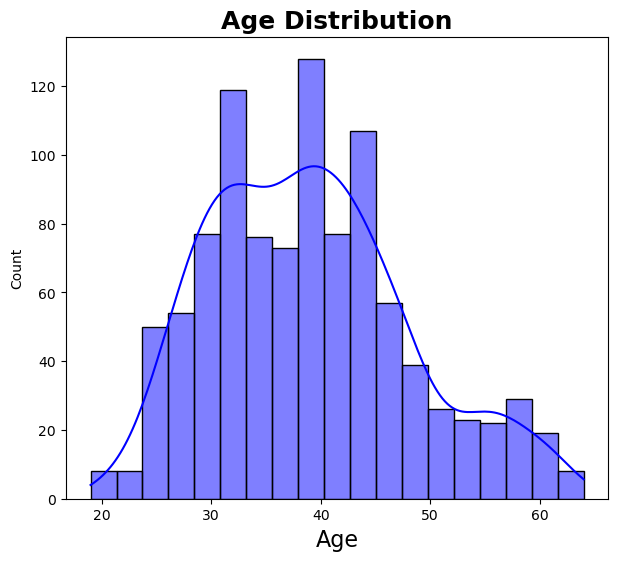

In [28]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [29]:
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

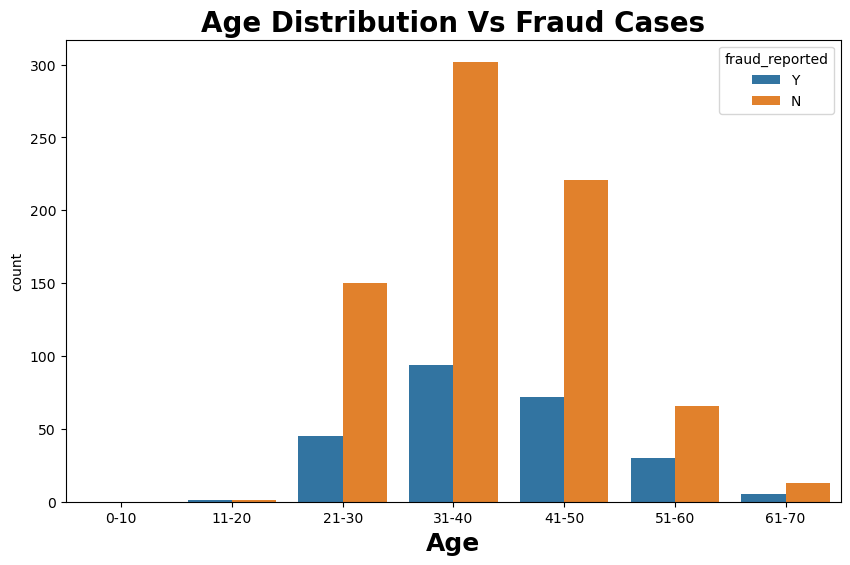

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.age_bins, hue=df.fraud_reported)
plt.xlabel('Age',fontsize=18,fontweight ='bold')
plt.title('Age Distribution Vs Fraud Cases', fontsize=20,fontweight ='bold')
plt.show()

In [31]:
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age,age_bins
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,Y,250,500,17,10,2014,25,1,11,41-50
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,Y,250,500,27,6,2006,21,1,8,41-50
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N,100,300,9,6,2000,22,2,8,21-30
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,250,500,25,5,1990,1,10,1,41-50
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N,500,1000,6,6,2014,17,2,6,41-50


In [32]:
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

In [33]:
#encoding
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age,age_bins
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1,1,2,17,10,2014,25,1,11,41-50
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,1,1,2,27,6,2006,21,1,8,41-50
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,0,0,1,9,6,2000,22,2,8,21-30
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,1,1,2,25,5,1990,1,10,1,41-50
4,228,44,0,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,0,2,0,6,6,2014,17,2,6,41-50


In [35]:
#outliers  detection and removal
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [36]:
len(Numerical)

21

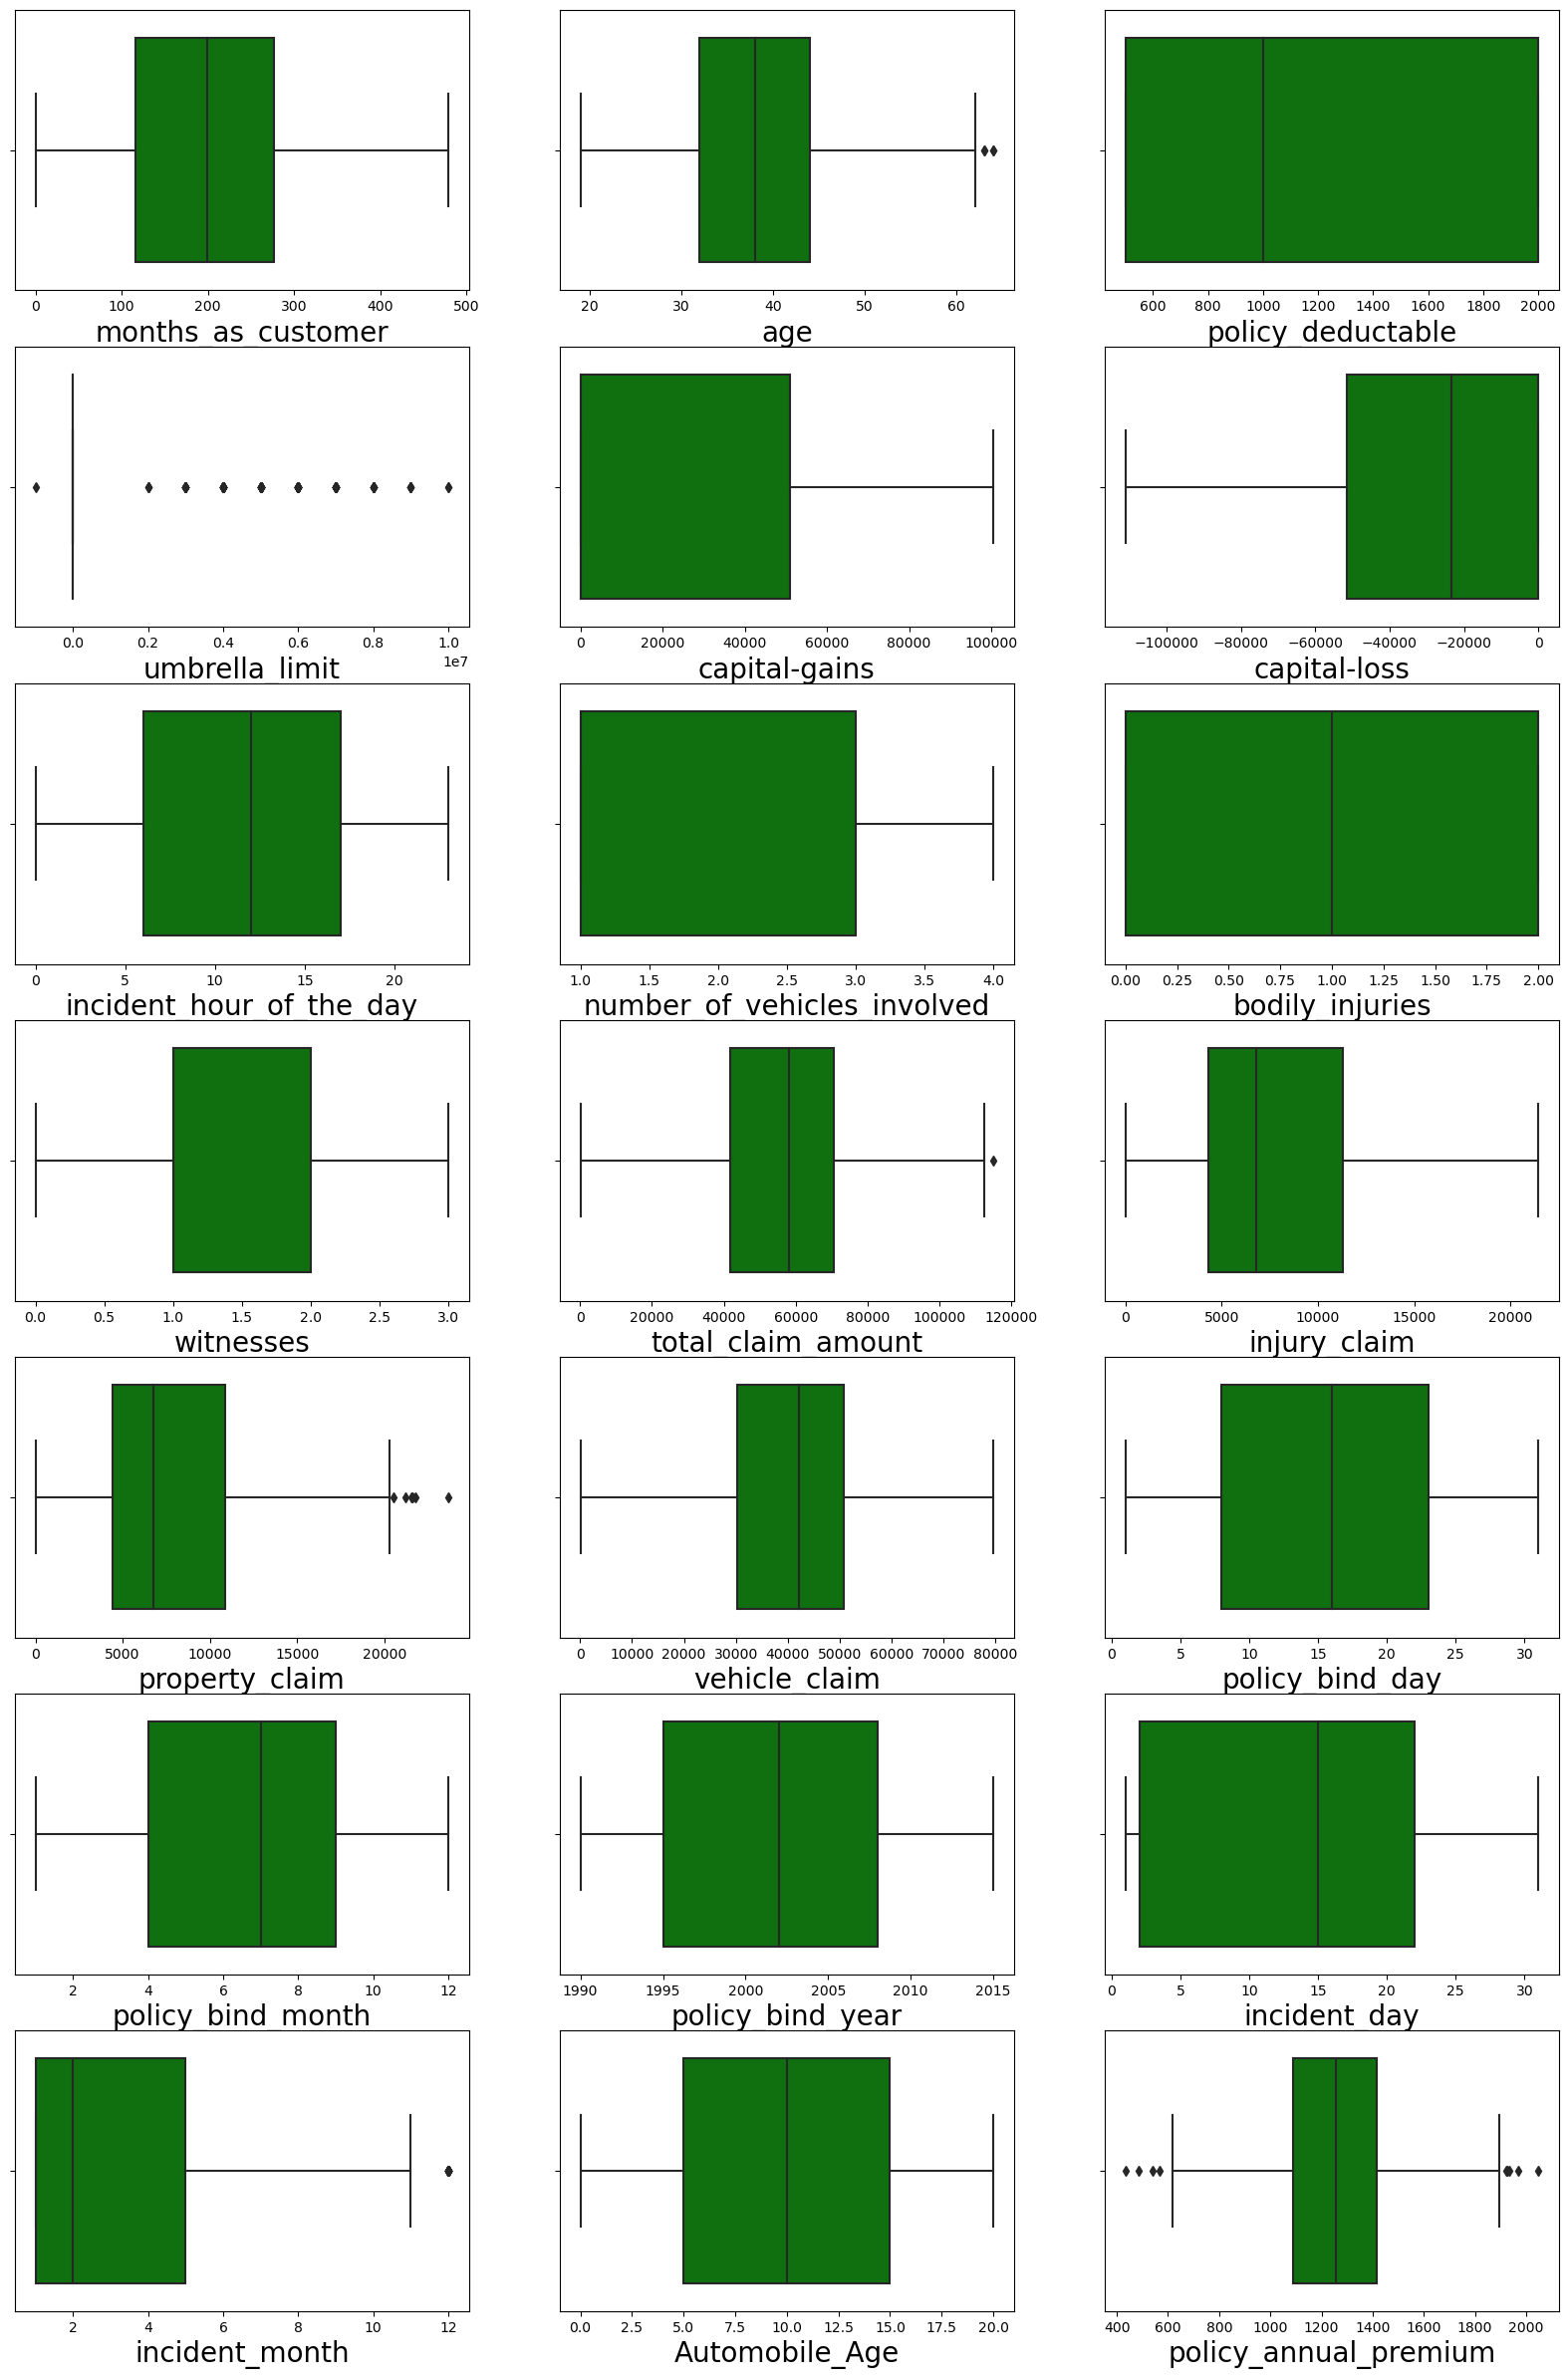

In [37]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

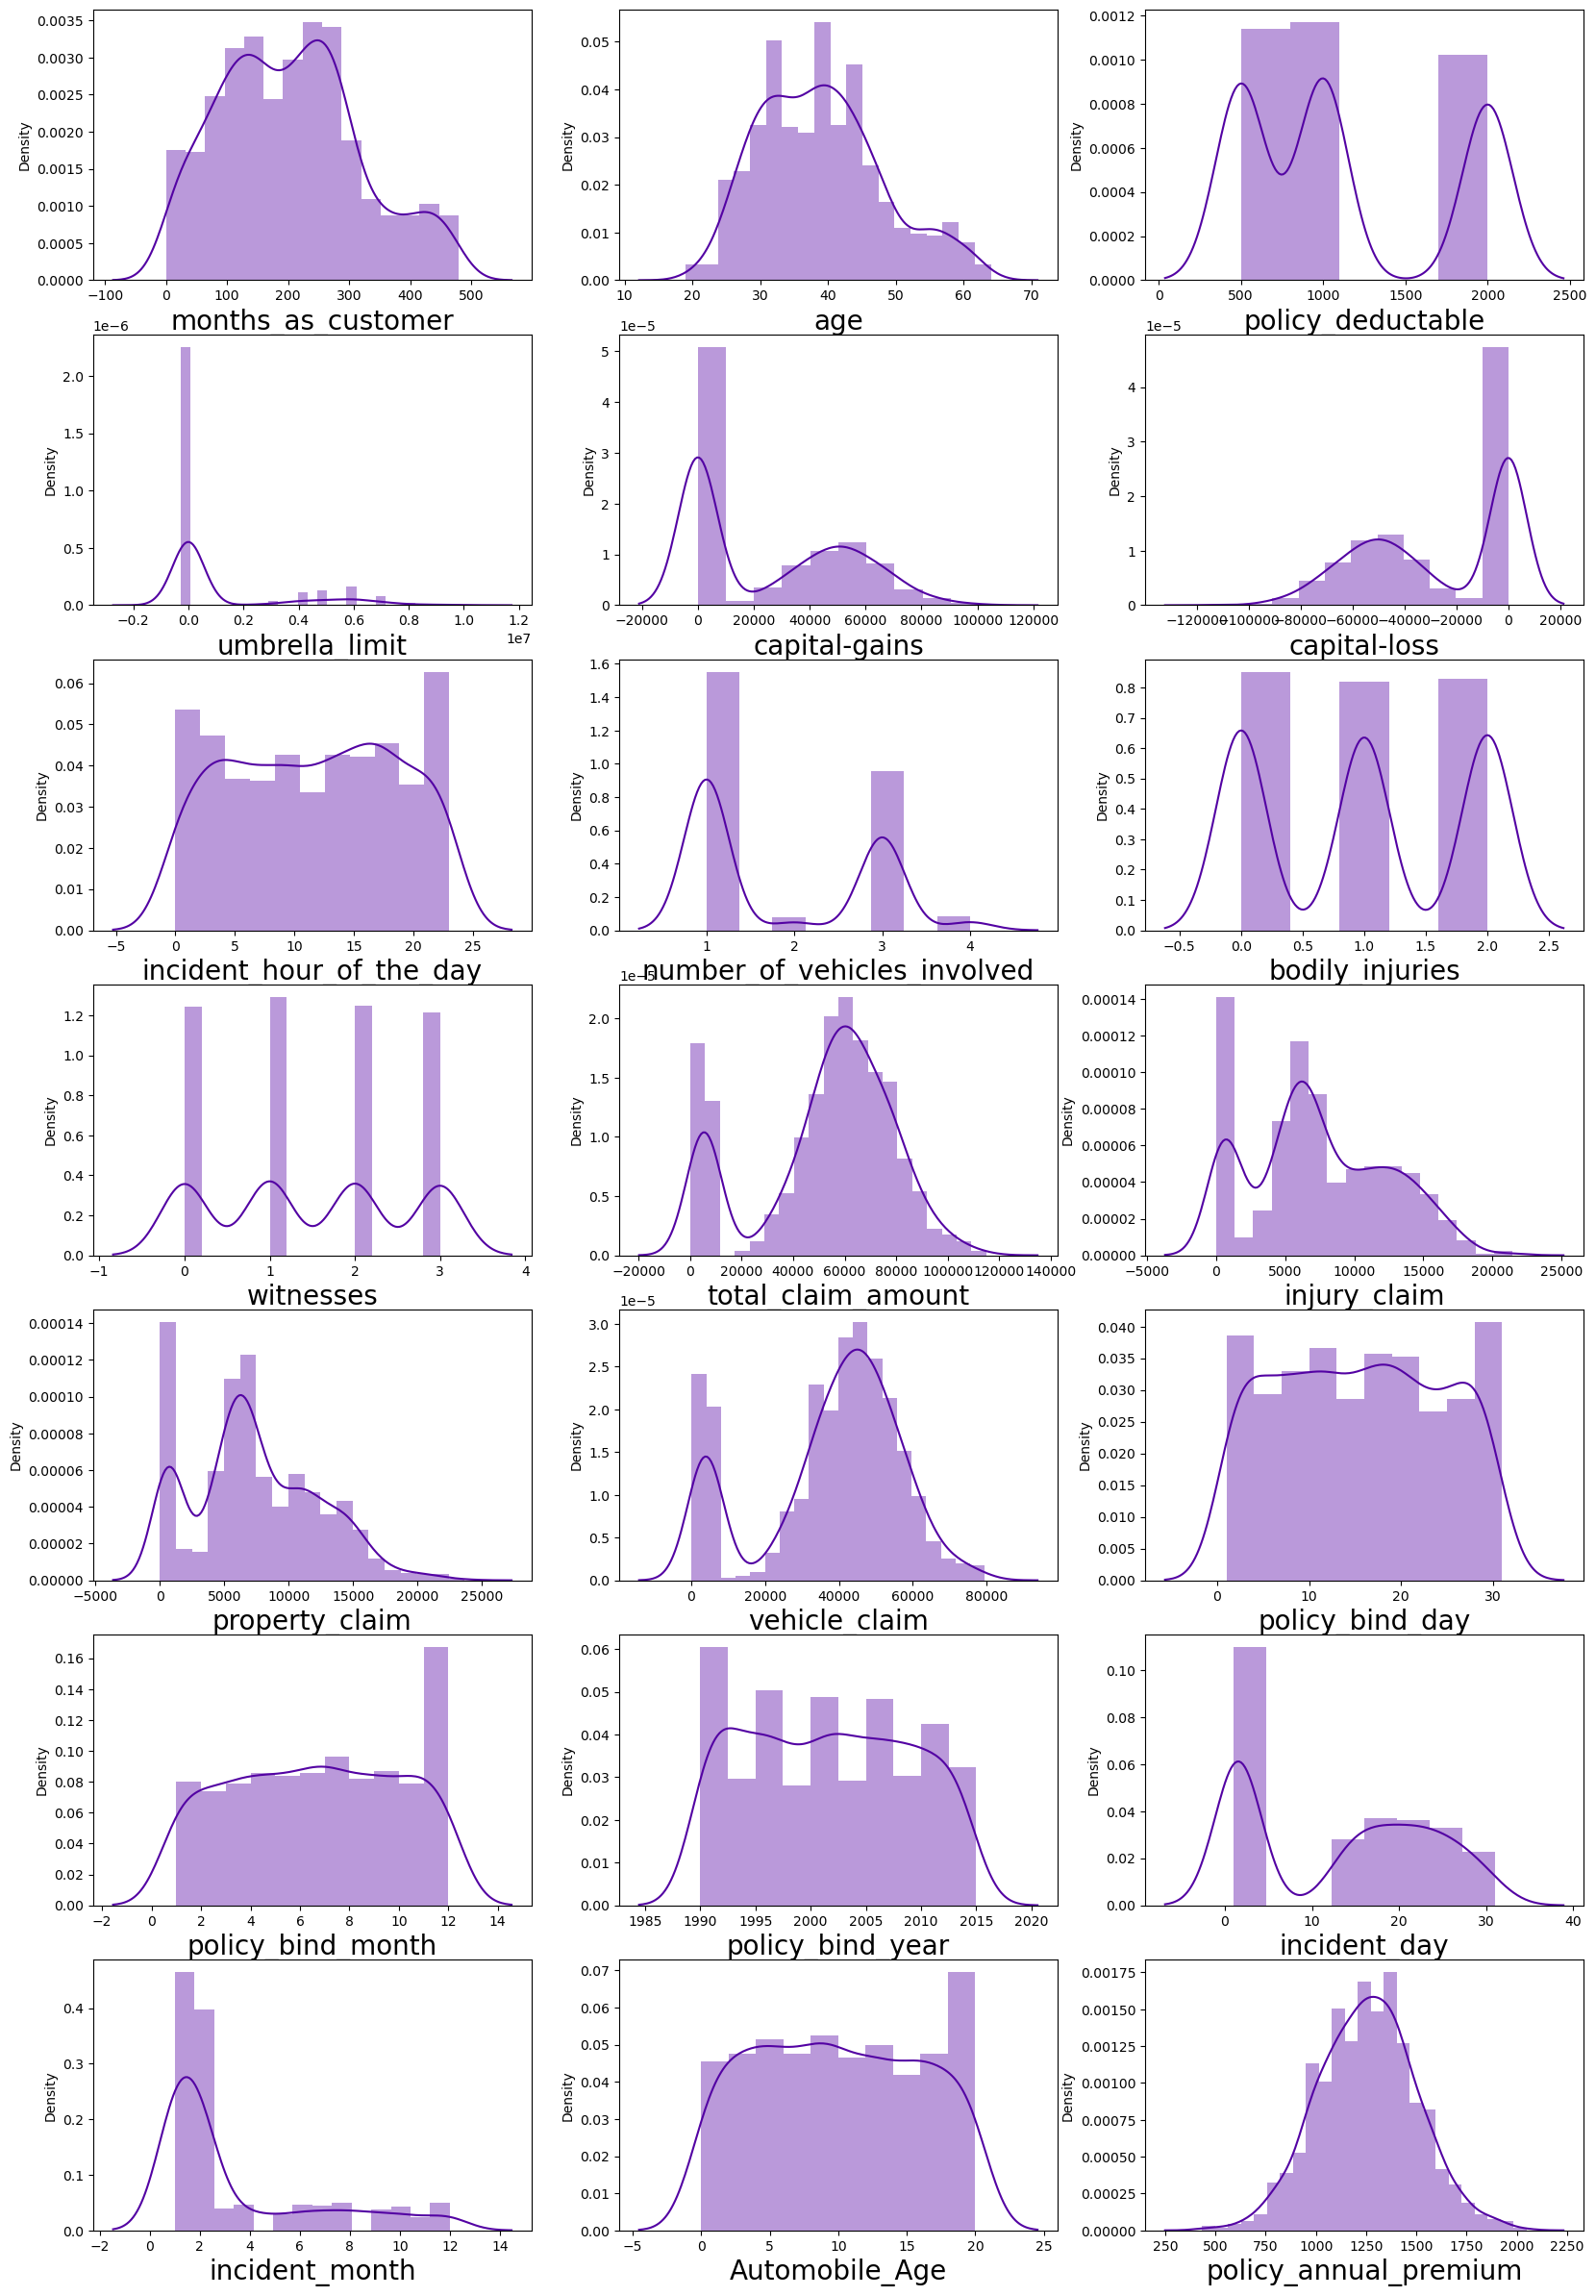

In [38]:
#SKewness 
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [39]:
df[Numerical].skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
policy_bind_day                0.024372
policy_bind_month             -0.029321
policy_bind_year               0.052511
incident_day                   0.059111
incident_month                 1.375894
Automobile_Age                 0.048289
policy_annual_premium          0.004402
dtype: float64

In [40]:
skew=['total_claim_amount','vehicle_claim']

In [41]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [42]:
df[skew] = scaler.fit_transform(df[skew].values)

In [43]:
df[skew].skew()

total_claim_amount   -0.510354
vehicle_claim        -0.522718
dtype: float64

In [44]:
#Corrleation
df.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age
months_as_customer,1.000000,0.922098,-0.000328,0.026807,0.005018,0.015498,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.072787,-0.059581,0.010021,0.005369,-0.000130,0.070639,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062495,0.065329,0.034940,0.061308,0.047655,0.004202,0.020544,-0.026819,0.008876,0.051728,0.005750,-0.048276,-0.011092,0.024659,0.000292
age,0.922098,1.000000,-0.014533,0.029188,0.014404,0.018126,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.075642,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.070386,0.075522,0.060898,0.062764,0.030410,0.017343,0.012143,-0.015185,0.009876,0.053869,0.015501,-0.037444,-0.006131,0.023404,-0.001354
policy_state,-0.000328,-0.014533,1.000000,0.010033,0.012455,-0.029580,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.052438,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,-0.008465,0.013384,0.022960,0.069017,-0.006305,-0.046290,0.008406,0.001464,0.017124,-0.025253,0.029432,0.001027,0.028838,0.002277,0.071450,-0.007276,0.014745,0.023643,-0.002114
policy_deductable,0.026807,0.029188,0.010033,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,-0.053912,-0.015711,-0.000760,0.006517,-0.045117,0.060935,0.051214,0.015770,-0.022765,0.066639,0.038036,0.023350,0.039107,0.064792,0.004875,-0.035379,-0.003268,0.014817,0.003384,-0.003931,0.009164,-0.050416,-0.049598,-0.018160,-0.006418,-0.026105
policy_annual_premium,0.005018,0.014404,0.012455,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.036556,-0.011155,-0.055191,0.046434,0.048724,-0.001578,-0.045991,0.080738,0.026780,0.002332,0.021998,0.008400,-0.017633,-0.011654,0.020028,0.000045,-0.031849,-0.014480,0.023978,0.003813,-0.025183,-0.035355,0.001249,0.014835,0.021559,0.049226
umbrella_limit,0.015498,0.018126,-0.029580,0.010870,-0.006247,1.000000,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,0.015966,0.010041,0.009466,0.029044,-0.077492,0.013094,-0.023257,-0.021270,-0.076358,0.022743,-0.006738,-0.044771,-0.040182,-0.045412,-0.023790,-0.038275,-0.004443,0.040256,0.058622,0.021636,0.015602,-0.045207,0.009961,0.048008,-0.021716,0.042409,-0.009893
insured_sex,0.060925,0.073337,-0.020481,-0.009733,0.038853,0.010688,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.020494,-0.021705,0.009952,-0.014293,-0.028168,0.017914,-0.022379,0.014470,0.019290,0.018793,0.026969,-0.020297,0.042463,0.006992,-0.024532,0.000924,-0.014868,-0.030626,0.026457,-0.018421,0.030873,-0.010757,0.070700,0.040713,-0.004033,-0.032891,-0.007280,0.024227,0.028247
insured_education_level,-0.000833,0.000969,-0.034327,0.015217,-0.019715,-0.019357,0.009002,1.000000,-0.020298,0.021807,-0.023488,0.039912,0.041193,0.013704,-0.019230,-0.006420,-0.010838,-0.005903,-0.018636,-0.057061,-0.003768,-0.048909,-0.012072,0.019211,0.051640,0.074466,0.081880,0.055794,0.068308,0.055202,0.049445,0.008808,0.009153,-0.006546,0.012610,-0.007118,0.018952,-0.058104,0.075083,-0.043509
insured_occupation,0.009814,0.017220,-0.031215,-0.046733,0.035922,0.023422,-0.006160,-0.020298,1.000000,-0.011077,-0.010171,-0.007824,-0.020171,0.003842,0.007401,0.004731,-0.007811,-0.022761,0.000390,-0.018435,

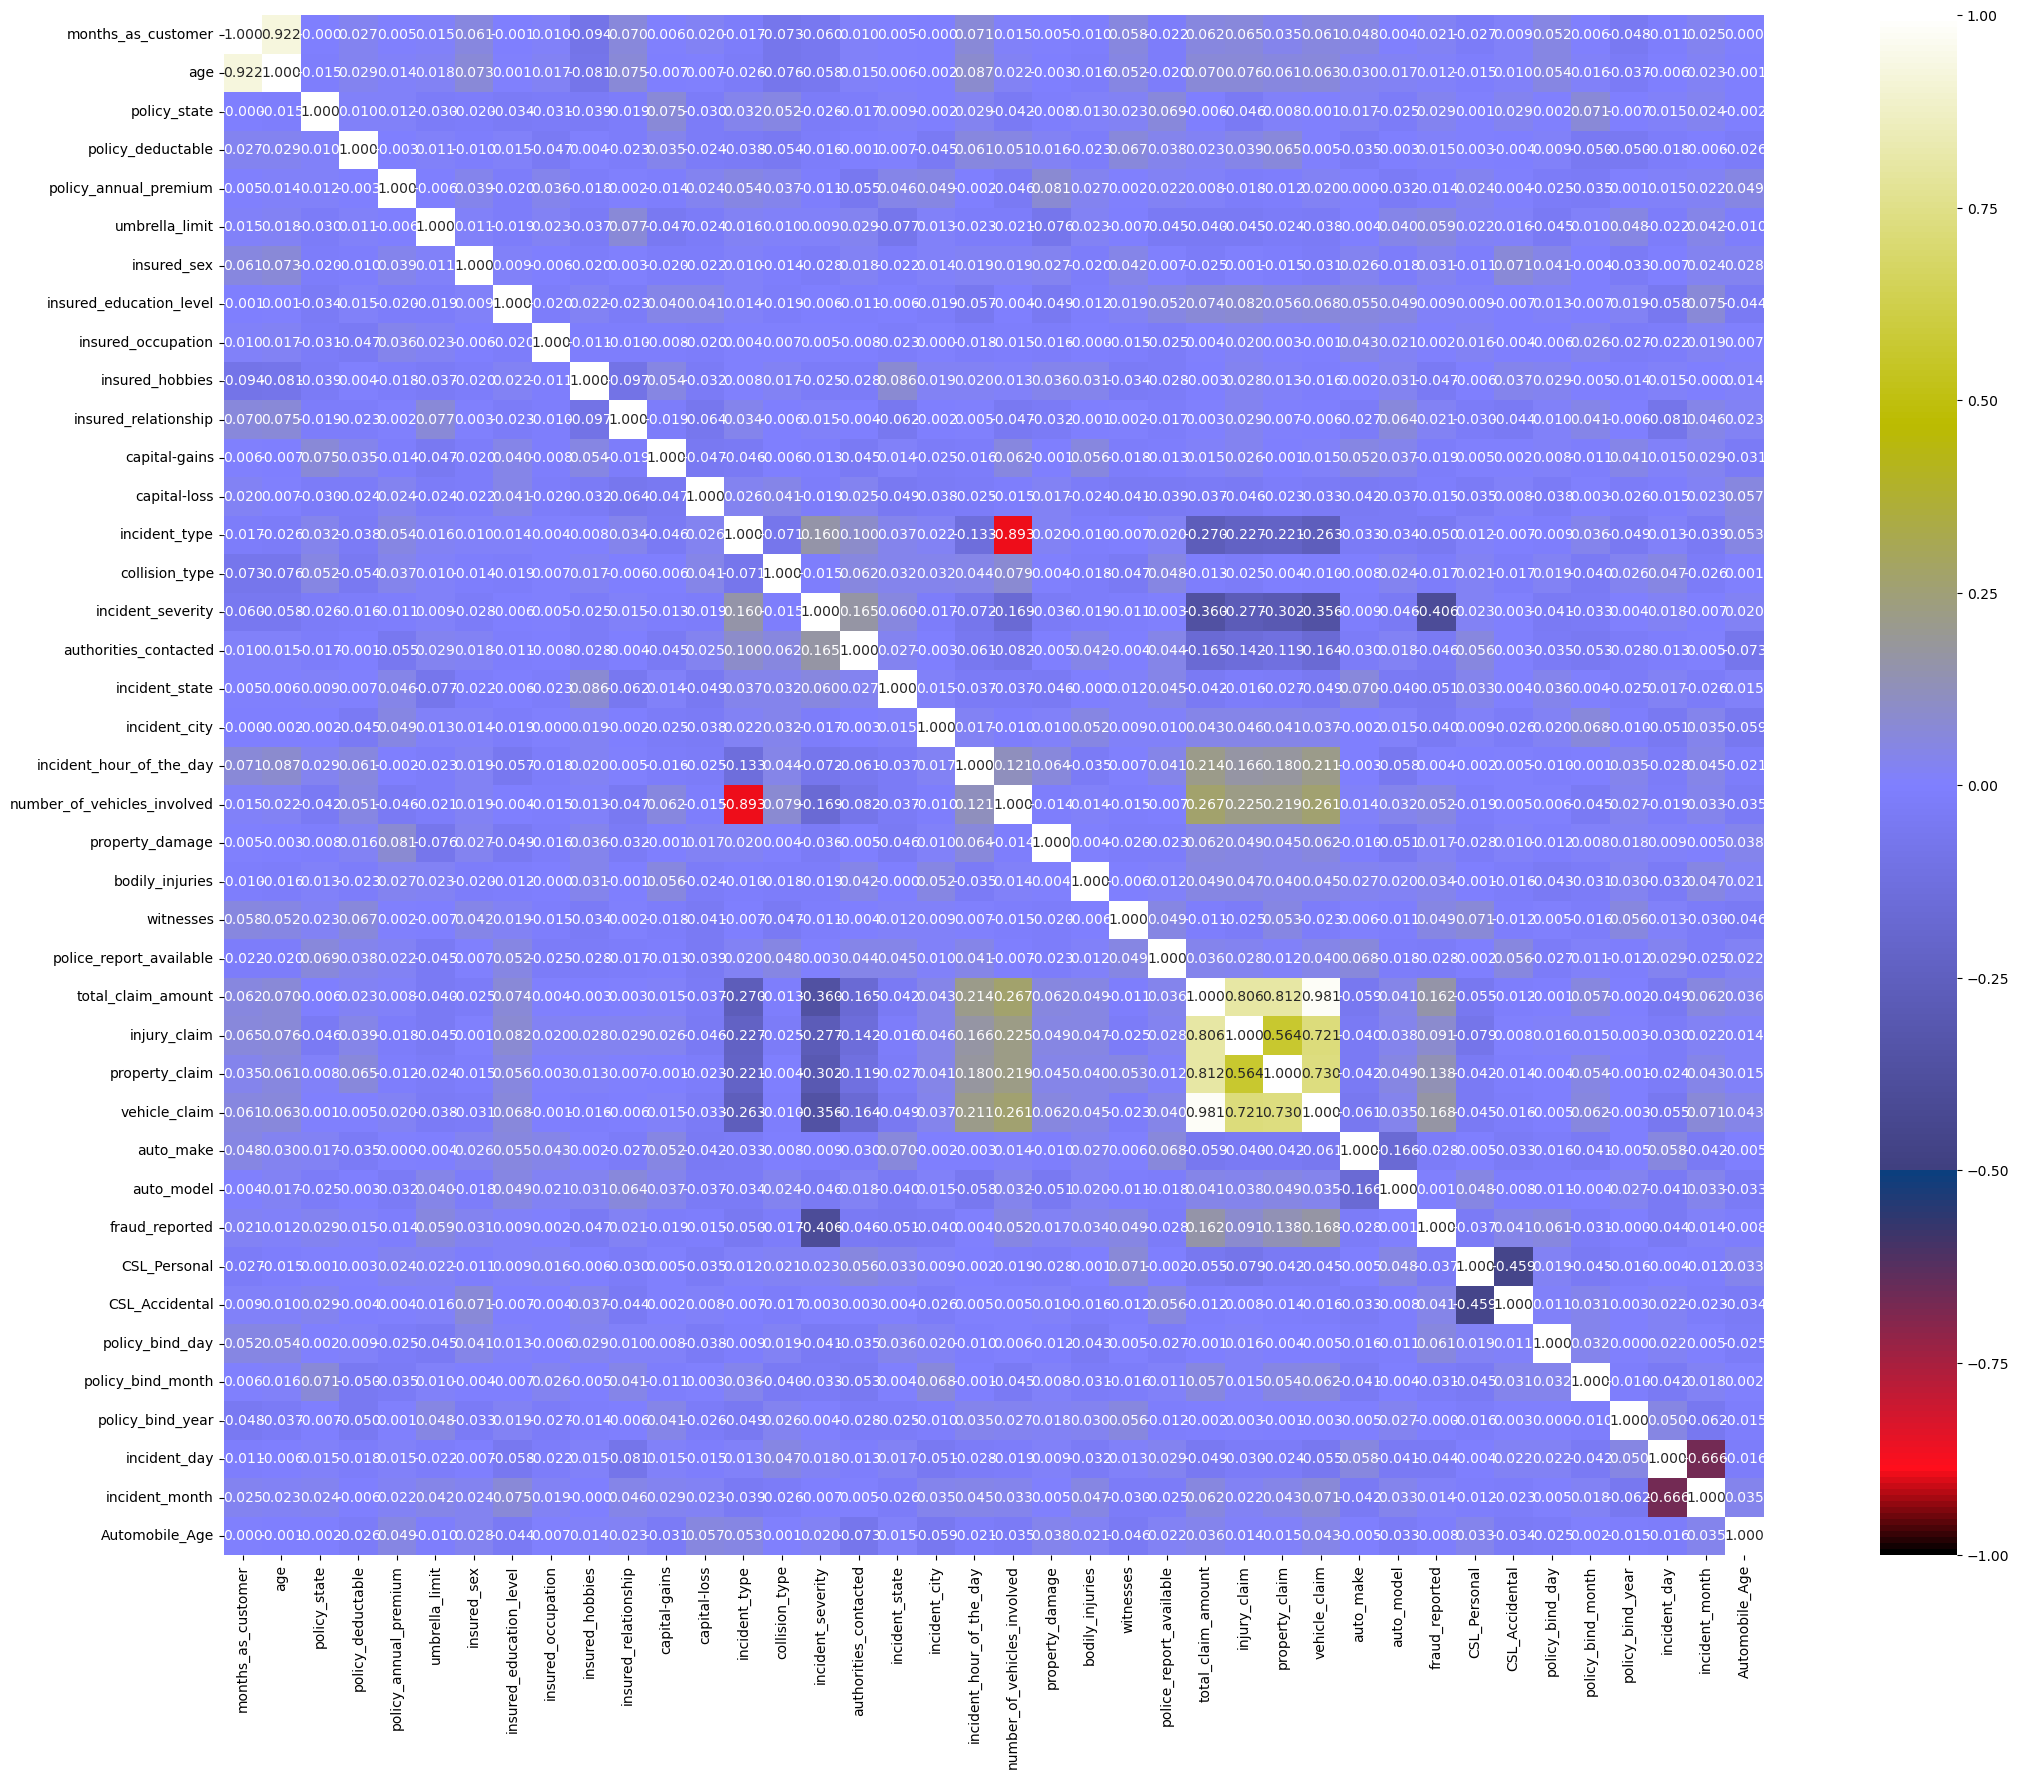

In [45]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

In [46]:
df.drop("age_bins",axis=1,inplace=True)

In [47]:
#balancing data
df.fraud_reported.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [52]:
Y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [53]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [54]:
Y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [55]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

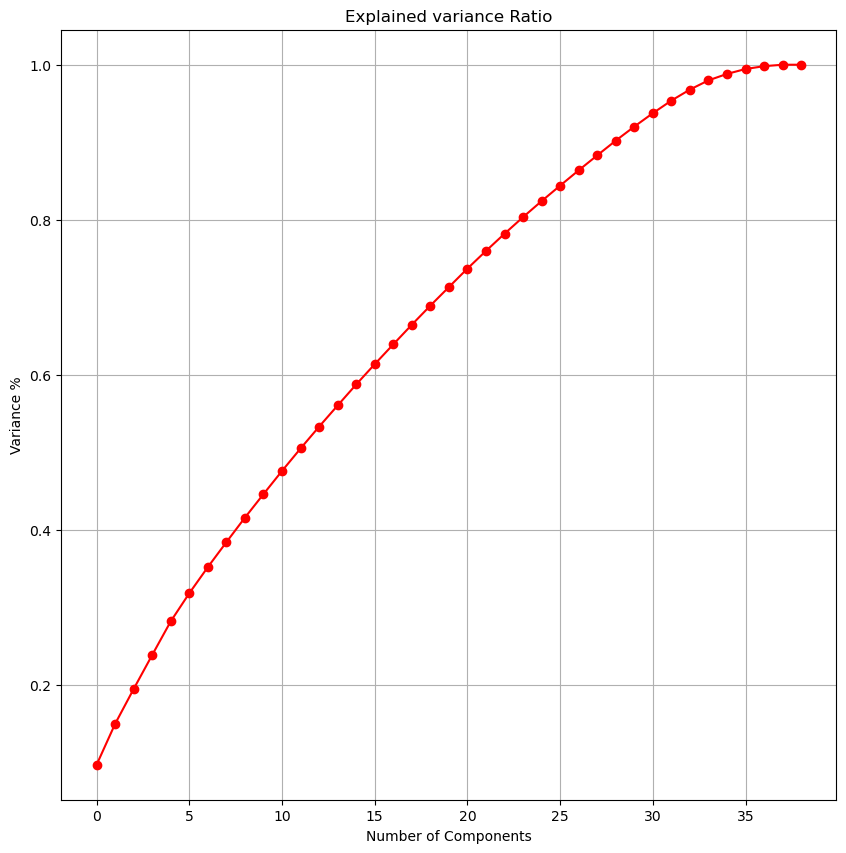

In [56]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [57]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [58]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

In [59]:
#MOdelbuilding
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1054, 28)
Training target vector size: (1054,)
Test feature matrix size: (452, 28)
Test target vector size: (452,)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8141592920353983 on Random_state 249


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=9, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.754424778761062


Confusion matrix of Logistics Regression : 
 [[166  64]
 [ 47 175]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       230
           1       0.73      0.79      0.76       222

    accuracy                           0.75       452
   macro avg       0.76      0.76      0.75       452
weighted avg       0.76      0.75      0.75       452



In [63]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4933181852095127
RMSE value for k=  2 is: 0.43619432220704535
RMSE value for k=  3 is: 0.525878952389589
RMSE value for k=  4 is: 0.48881290193421156
RMSE value for k=  5 is: 0.525878952389589
RMSE value for k=  6 is: 0.5131026566713389
RMSE value for k=  7 is: 0.550542773209079
RMSE value for k=  8 is: 0.5195300803849366
RMSE value for k=  9 is: 0.5465094385019178
RMSE value for k=  10 is: 0.5216549566574727
RMSE value for k=  11 is: 0.5604991454368136
RMSE value for k=  12 is: 0.540402996133523
RMSE value for k=  13 is: 0.5722181649673349
RMSE value for k=  14 is: 0.5444815671729857
RMSE value for k=  15 is: 0.5779885781398946
RMSE value for k=  16 is: 0.5565379710984114
RMSE value for k=  17 is: 0.5663889654442353
RMSE value for k=  18 is: 0.552548400154479
RMSE value for k=  19 is: 0.5741480799402843
RMSE value for k=  20 is: 0.5624692715303914


In [64]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

In [65]:
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.754424778761062


Confusion matrix : 
 [[166  64]
 [ 47 175]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.72      0.75       230
           1       0.73      0.79      0.76       222

    accuracy                           0.75       452
   macro avg       0.76      0.76      0.75       452
weighted avg       0.76      0.75      0.75       452



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8030973451327433


Confusion matrix : 
 [[185  45]
 [ 44 178]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       230
           1       0.80      0.80      0.80       222

    accuracy                           0.80       452
   macro avg       0.80      0.80      0.80       452
weighted avg       0.80      0.80      0.80      

In [66]:
#Cross Validation
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.59602649 0.72093023 0.83388704 0.84053156 0.86710963]
Mean Score : 0.7716969923654045
Std deviation : 0.10114026091767642




Cross Validation Score SVC() :

Score : [0.5794702  0.70099668 0.87707641 0.88704319 0.94019934]
Mean Score : 0.7969571626586873
Std deviation : 0.1353232430733374




Cross Validation Score GaussianNB() :

Score : [0.55960265 0.68438538 0.84053156 0.8538206  0.90365449]
Mean Score : 0.7683989351169391
Std deviation : 0.1276308789068261




Cross Validation Score DecisionTreeClassifier() :

Score : [0.57615894 0.65448505 0.74750831 0.77076412 0.77408638]
Mean Score : 0.7046005588435899
Std deviation : 0.0775316506553114




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.68543046 0.72425249 0.78405316 0.77740864 0.73754153]
Mean Score : 0.7417372555059295
Std deviation : 0.03621286753984814




Cross Validation Score RandomForestClassifier() :

Score : [0.61258278 0.73089701 0.8

In [67]:
#Hyper Tuning
from sklearn.model_selection import GridSearchCV

In [68]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [69]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.815 total time=   0.0s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.853 total time=   0.0s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.773 total time=   0.0s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=10)

In [70]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 400}

In [71]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 200, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8252212389380531


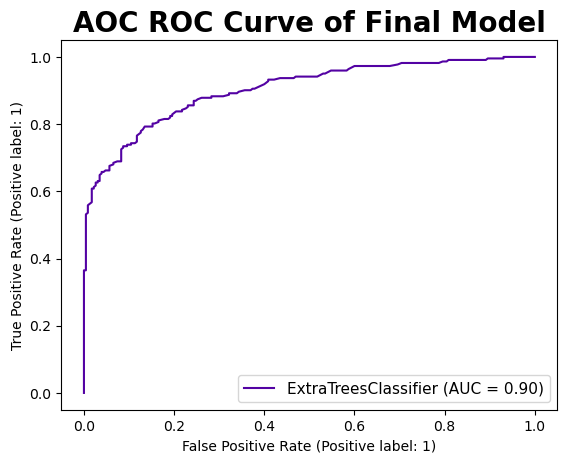

Auc Score :
 0.8248139443791618


In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

In [75]:
import joblib
joblib.dump(Final_mod,'Insurance_claims_Final.pkl')

['Insurance_claims_Final.pkl']